In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [7]:
class AllKNN:
    def __init__(self, k=3):
        self.k = k

    def fit_resample(self, X, y):
        nn = NearestNeighbors(n_neighbors=self.k + 1)
        nn.fit(X)

        distances, indices = nn.kneighbors(X)

        indices_to_remove = []

        for i in range(len(X)):
            neighbors = indices[i][1:]

            neighbor_labels = y[neighbors]
            if Counter(neighbor_labels).most_common(1)[0][0] != y[i]:
                indices_to_remove.append(i)

        mask = np.ones(len(X), dtype=bool)
        mask[indices_to_remove] = False
        X_resampled = X[mask]
        y_resampled = y[mask]

        class_counts = Counter(y_resampled)
        min_class_count = min(class_counts.values())

        X_balanced = []
        y_balanced = []

        for class_label in class_counts.keys():
            class_indices = np.where(y == class_label)[0]
            selected_indices = np.random.choice(class_indices, min_class_count, replace=False)
            X_balanced.append(X[selected_indices])
            y_balanced.append(y[selected_indices])

        X_balanced = np.vstack(X_balanced)
        y_balanced = np.hstack(y_balanced)
        return X_balanced, y_balanced

In [12]:
allknn = AllKNN(k=3)
X_train_resampled, y_train_resampled = allknn.fit_resample(X_train, y_train)

In [13]:
print("y_train:", Counter(y_train))
print("y_train_resampled:", Counter(y_train_resampled))

y_train: Counter({2: 44, 0: 42, 1: 41})
y_train_resampled: Counter({2: 38, 0: 38, 1: 38})


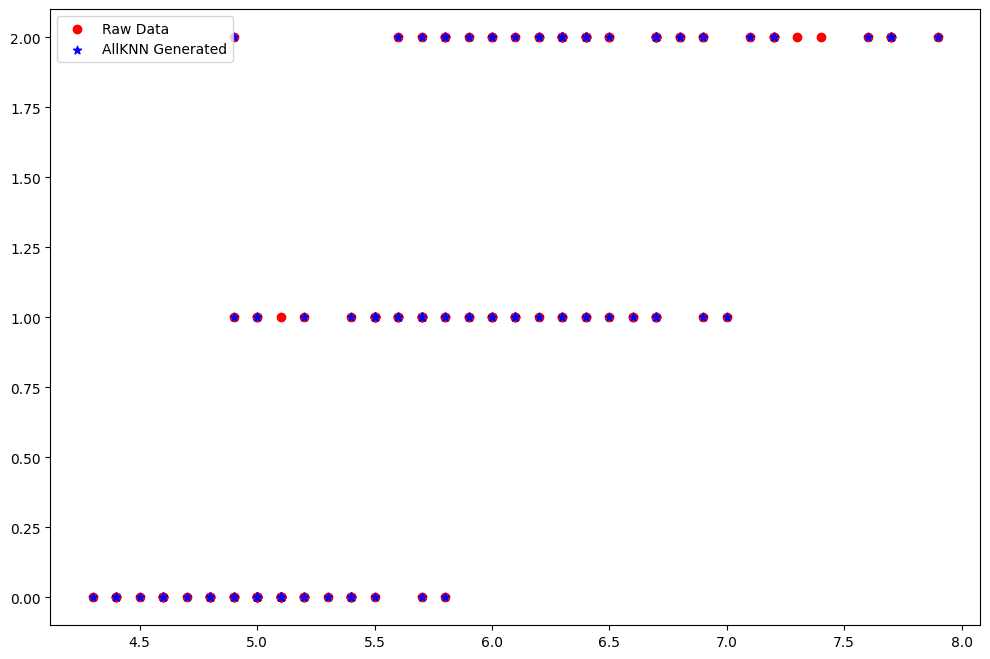

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], y_train, color="r", marker="o")
plt.scatter(X_train_resampled[:, 0], y_train_resampled, color="b", marker="*")
plt.legend(["Raw Data", "AllKNN Generated"])
plt.show()